In [9]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.signal import convolve


The shape of our soundbyte is (331776, 2)


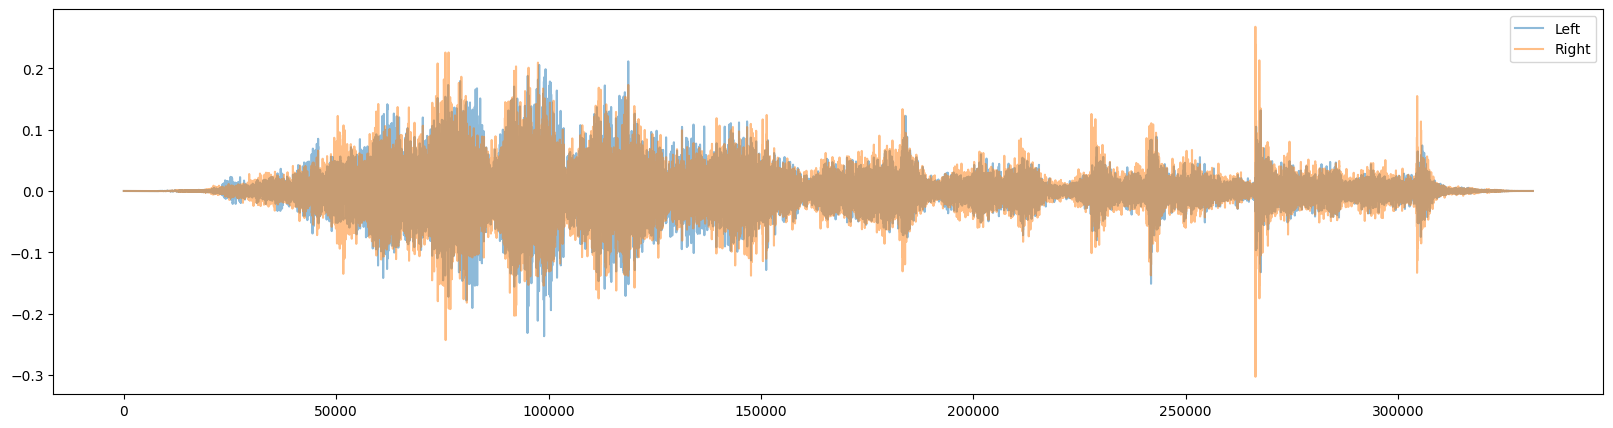

In [ ]:

# Let's load the first file we will work with
soundbyte, soundbyte_samplerate = sf.read('laugh2.wav')

# soundbyte is now a 2D numpy array
print('The shape of our soundbyte is',soundbyte.shape)

# It has two channels in this case, one for each 'ear', left and right
# we can plot these waves
Left = soundbyte[:,0]
Right = soundbyte[:,1]

plt.plot(Left, label='Left', alpha=0.5)
plt.plot(Right, label='Right', alpha=0.5)
plt.legend()

The shape of our clap soundbyte is (32896, 2)
The shape of our splash soundbyte is (470667, 2)
The shape of our reverb soundbyte is (536457, 2)


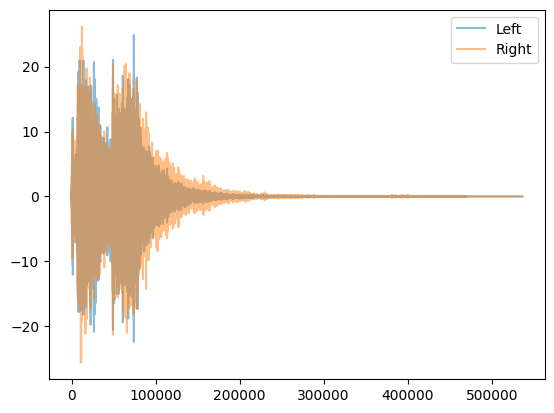

In [17]:
soundbyte_clap, _ = sf.read('Sofia-Borisovata-Gradina-Park--Hand-Clap-Sample--(Sennheiser-MKH8040-cardioid).wav')
soundbyte_splash, _ = sf.read('Splash 6.wav')

print('The shape of our clap soundbyte is',soundbyte_clap.shape)
print('The shape of our splash soundbyte is',soundbyte_splash.shape)

soundbyte_clap_left = soundbyte_clap[:,0]
soundbyte_clap_right = soundbyte_clap[:,1]
soundbyte_splash_left = soundbyte_splash[:,0]
soundbyte_splash_right = soundbyte_splash[:,1]

reverb_left = convolve(Left, soundbyte_clap_left, mode='full')
reverb_right = convolve(Right, soundbyte_clap_right, mode='full')

reverb = np.column_stack((reverb_left, reverb_right))

print('The shape of our reverb soundbyte is',reverb.shape)

Left = reverb[:,0]
Right = reverb[:,1]

plt.plot(Left, label='Left', alpha=0.5)
plt.plot(Right, label='Right', alpha=0.5)
plt.legend()

from IPython.display import Audio, display

# notice that we transpose the soundbyte using .T
# to use it with Ipython Audio
sound = Audio(reverb.T, rate=soundbyte_samplerate, autoplay=True) 
sound